# Autoencoder
https://www.kaggle.com/shivamb/how-autoencoders-work-intro-and-usecases

## Data

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

In [3]:
data = pd.read_csv("../data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
X = data.drop('Class', axis=1)
y = data.Class

X_sca_MM = MinMaxScaler().fit_transform(X.values)
X_sca_R = RobustScaler().fit_transform(X.values)
X_sca_Std = StandardScaler().fit_transform(X.values)

## Create network

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import regularizers

print(tf.__version__)

2.0.0


In [12]:
input_dim = X.shape[1]

## input layer 
input_layer = Input(shape=(input_dim,)) # num_features

## encoding part
encoded = Dense(500, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(250, activation='relu')(encoded)
encoded = Dense(5, activation='relu')(encoded)

## decoding part
decoded = Dense(10, activation='tanh')(encoded)
decoded = Dense(20, activation='tanh')(decoded)

## output layer
output_layer = Dense(input_dim, activation='relu')(decoded)

In [13]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(learning_rate=0.002, optimizer="adadelta", loss="mse")

In [14]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 500)               15500     
_________________________________________________________________
dense_7 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 1255      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_10 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_11 (Dense)             (None, 30)                630 

## Train Network

In [15]:
X_inp = X_sca_Std # allows us to switch between different scaling methods

In [16]:
X_norm, X_fraud = X_inp[y == 0], X_inp[y == 1]

In [18]:
num_train_samples = 10000

autoencoder.fit(X_norm[:num_train_samples], X_norm[:num_train_samples], 
                batch_size=64, epochs=500, 
                shuffle=True, validation_split=0.20);

Train on 8000 samples, validate on 2000 samples
Epoch 1/500
8000/8000 [==============================] - 1s 77us/sample - loss: 1.0399 - val_loss: 1.0197
Epoch 2/500
8000/8000 [==============================] - 1s 92us/sample - loss: 1.0397 - val_loss: 1.0193
Epoch 3/500
8000/8000 [==============================] - 1s 79us/sample - loss: 1.0394 - val_loss: 1.0189
Epoch 4/500
8000/8000 [==============================] - 1s 78us/sample - loss: 1.0392 - val_loss: 1.0185
Epoch 5/500
8000/8000 [==============================] - 1s 78us/sample - loss: 1.0389 - val_loss: 1.0182
Epoch 6/500
8000/8000 [==============================] - 1s 79us/sample - loss: 1.0387 - val_loss: 1.0178
Epoch 7/500
8000/8000 [==============================] - 1s 78us/sample - loss: 1.0385 - val_loss: 1.0174
Epoch 8/500
8000/8000 [==============================] - 1s 79us/sample - loss: 1.0382 - val_loss: 1.0171
Epoch 9/500
8000/8000 [==============================] - 1s 77us/sample - loss: 1.0380 - val_loss: 1.016

8000/8000 [==============================] - 1s 85us/sample - loss: 1.0265 - val_loss: 0.9982
Epoch 78/500
8000/8000 [==============================] - 1s 85us/sample - loss: 1.0263 - val_loss: 0.9980
Epoch 79/500
8000/8000 [==============================] - 1s 78us/sample - loss: 1.0262 - val_loss: 0.9977
Epoch 80/500
8000/8000 [==============================] - 1s 85us/sample - loss: 1.0260 - val_loss: 0.9975
Epoch 81/500
8000/8000 [==============================] - 1s 78us/sample - loss: 1.0259 - val_loss: 0.9972
Epoch 82/500
8000/8000 [==============================] - 1s 78us/sample - loss: 1.0258 - val_loss: 0.9970
Epoch 83/500
8000/8000 [==============================] - ETA: 0s - loss: 1.008 - 1s 82us/sample - loss: 1.0256 - val_loss: 0.9967
Epoch 84/500
8000/8000 [==============================] - 1s 79us/sample - loss: 1.0255 - val_loss: 0.9965
Epoch 85/500
8000/8000 [==============================] - 1s 94us/sample - loss: 1.0253 - val_loss: 0.9963
Epoch 86/500
8000/8000 [==

Epoch 153/500
8000/8000 [==============================] - 1s 80us/sample - loss: 1.0145 - val_loss: 0.9779
Epoch 154/500
8000/8000 [==============================] - 1s 82us/sample - loss: 1.0144 - val_loss: 0.9776
Epoch 155/500
8000/8000 [==============================] - 1s 76us/sample - loss: 1.0142 - val_loss: 0.9774
Epoch 156/500
8000/8000 [==============================] - 1s 80us/sample - loss: 1.0140 - val_loss: 0.9771
Epoch 157/500
8000/8000 [==============================] - 1s 77us/sample - loss: 1.0139 - val_loss: 0.9769
Epoch 158/500
8000/8000 [==============================] - 1s 84us/sample - loss: 1.0137 - val_loss: 0.9766
Epoch 159/500
8000/8000 [==============================] - 1s 80us/sample - loss: 1.0135 - val_loss: 0.9764
Epoch 160/500
8000/8000 [==============================] - 1s 75us/sample - loss: 1.0134 - val_loss: 0.9761
Epoch 161/500
8000/8000 [==============================] - 1s 82us/sample - loss: 1.0132 - val_loss: 0.9759
Epoch 162/500
8000/8000 [===

8000/8000 [==============================] - 1s 75us/sample - loss: 1.0045 - val_loss: 0.9636
Epoch 229/500
8000/8000 [==============================] - 1s 79us/sample - loss: 1.0044 - val_loss: 0.9635
Epoch 230/500
8000/8000 [==============================] - 1s 76us/sample - loss: 1.0043 - val_loss: 0.9633
Epoch 231/500
8000/8000 [==============================] - 1s 82us/sample - loss: 1.0042 - val_loss: 0.9632
Epoch 232/500
8000/8000 [==============================] - 1s 75us/sample - loss: 1.0041 - val_loss: 0.9630
Epoch 233/500
8000/8000 [==============================] - 1s 75us/sample - loss: 1.0040 - val_loss: 0.9629
Epoch 234/500
8000/8000 [==============================] - 1s 89us/sample - loss: 1.0039 - val_loss: 0.9628
Epoch 235/500
8000/8000 [==============================] - 1s 105us/sample - loss: 1.0038 - val_loss: 0.9626
Epoch 236/500
8000/8000 [==============================] - 1s 106us/sample - loss: 1.0037 - val_loss: 0.9625
Epoch 237/500
8000/8000 [===============

Epoch 304/500
8000/8000 [==============================] - 1s 77us/sample - loss: 0.9975 - val_loss: 0.9542
Epoch 305/500
8000/8000 [==============================] - 1s 81us/sample - loss: 0.9974 - val_loss: 0.9541
Epoch 306/500
8000/8000 [==============================] - 1s 78us/sample - loss: 0.9974 - val_loss: 0.9540
Epoch 307/500
8000/8000 [==============================] - 1s 78us/sample - loss: 0.9973 - val_loss: 0.9539
Epoch 308/500
8000/8000 [==============================] - 1s 78us/sample - loss: 0.9972 - val_loss: 0.9537
Epoch 309/500
8000/8000 [==============================] - 1s 78us/sample - loss: 0.9971 - val_loss: 0.9536
Epoch 310/500
8000/8000 [==============================] - 1s 77us/sample - loss: 0.9970 - val_loss: 0.9535
Epoch 311/500
8000/8000 [==============================] - 1s 78us/sample - loss: 0.9969 - val_loss: 0.9534
Epoch 312/500
8000/8000 [==============================] - 1s 78us/sample - loss: 0.9968 - val_loss: 0.9533
Epoch 313/500
8000/8000 [===

8000/8000 [==============================] - 1s 75us/sample - loss: 0.9907 - val_loss: 0.9453
Epoch 380/500
8000/8000 [==============================] - 1s 79us/sample - loss: 0.9906 - val_loss: 0.9452
Epoch 381/500
8000/8000 [==============================] - 1s 77us/sample - loss: 0.9905 - val_loss: 0.9451
Epoch 382/500
8000/8000 [==============================] - 1s 75us/sample - loss: 0.9904 - val_loss: 0.9450
Epoch 383/500
8000/8000 [==============================] - 1s 75us/sample - loss: 0.9903 - val_loss: 0.9449
Epoch 384/500
8000/8000 [==============================] - 1s 75us/sample - loss: 0.9902 - val_loss: 0.9447
Epoch 385/500
8000/8000 [==============================] - 1s 102us/sample - loss: 0.9901 - val_loss: 0.9446
Epoch 386/500
8000/8000 [==============================] - 1s 122us/sample - loss: 0.9900 - val_loss: 0.9445
Epoch 387/500
8000/8000 [==============================] - 1s 119us/sample - loss: 0.9899 - val_loss: 0.9444
Epoch 388/500
8000/8000 [==============

Epoch 455/500
8000/8000 [==============================] - 1s 93us/sample - loss: 0.9840 - val_loss: 0.9368
Epoch 456/500
8000/8000 [==============================] - 1s 79us/sample - loss: 0.9839 - val_loss: 0.9367
Epoch 457/500
8000/8000 [==============================] - 1s 75us/sample - loss: 0.9838 - val_loss: 0.9366
Epoch 458/500
8000/8000 [==============================] - 1s 74us/sample - loss: 0.9837 - val_loss: 0.9365
Epoch 459/500
8000/8000 [==============================] - 1s 75us/sample - loss: 0.9836 - val_loss: 0.9364
Epoch 460/500
8000/8000 [==============================] - 1s 75us/sample - loss: 0.9835 - val_loss: 0.9363
Epoch 461/500
8000/8000 [==============================] - 1s 74us/sample - loss: 0.9834 - val_loss: 0.9362
Epoch 462/500
8000/8000 [==============================] - 1s 74us/sample - loss: 0.9834 - val_loss: 0.9361
Epoch 463/500
8000/8000 [==============================] - 1s 74us/sample - loss: 0.9833 - val_loss: 0.9360
Epoch 464/500
8000/8000 [===

## Get latent representation

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

from MulticoreTSNE import MulticoreTSNE as TSNE

def plot_cluster(X, y, title='t_SNE'):    
    X = TSNE(n_components=2, random_state=0).fit_transform(X)
    fig = plt.figure(figsize=(12, 12))
    plt.scatter(X[:,0], X[:,1], cmap='coolwarm', c=(y==0), label='No Fraud', linewidth=2)
    plt.scatter(X[:,0], X[:,1], cmap='coolwarm', c=(y==1), label='Fraud', linewidth=2)
    plt.title(title, fontsize=14)
    plt.show()

In [20]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [21]:
norm_latent = hidden_representation.predict(X_norm[:3000])
fraud_latent = hidden_representation.predict(X_fraud)

In [22]:
rep_x = np.append(norm_latent, fraud_latent, axis = 0)
y_n = np.zeros(norm_latent.shape[0])
y_f = np.ones(fraud_latent.shape[0])
rep_y = np.append(y_n, y_f)

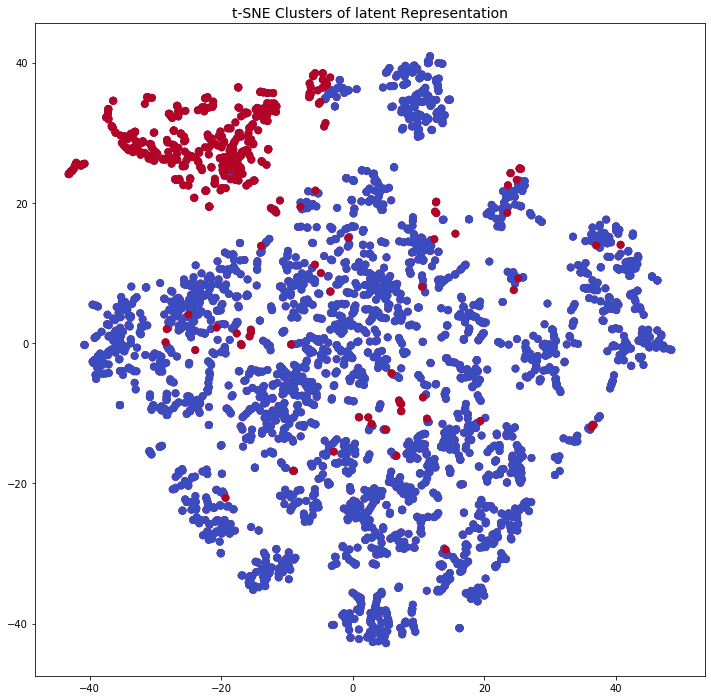

In [23]:
plot_cluster(rep_x, rep_y, title='t-SNE Clusters of latent Representation')

## Classify

In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [25]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25, random_state=42)
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("Classification Report:\n")
print (classification_report(val_y, pred_y))

print (f"Accuracy: {accuracy_score(val_y, pred_y)}")

Classification Report:

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       748
         1.0       0.98      0.93      0.95       125

    accuracy                           0.99       873
   macro avg       0.99      0.96      0.97       873
weighted avg       0.99      0.99      0.99       873

Accuracy: 0.9873997709049256
